In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Read peak frame list

In [2]:
# with open ("ecg_find_normal_30min", 'rb') as f:
#     events_normal = pickle.load(f)
# with open ("ecg_find_osa_30min", 'rb') as f:
#     events_osa = pickle.load(f)
with open ("Data/ecg_find_private_test_30min", 'rb') as f:
    events_test = pickle.load(f)
#with open ("Data/ecg_find_private_test_30min", 'rb') as f:
#    events_private_test = pickle.load(f)  

# Suspect RR interval

In [3]:
# diffs_normal = []
# diffs_osa = []
diffs_test = []

# for i in events_normal:
#     diffs_normal.append(np.diff(i[0][:,0]))
# for i in events_osa:
#     diffs_osa.append(np.diff(i[0][:,0]))
for i in events_test:
    diffs_test.append(np.diff(i[0][:,0]))
    
#diffs_private_test = []
#for i in events_private_test:
#    diffs_private_test.append(np.diff(i[0][:,0]))

# 오류가 있는 RR interval 바로잡기

In [4]:
def rr_correction(diffs_list):
    rr = []
    for diffs in diffs_list:
        correction = []
        m = np.median(diffs)
        num_diffs = len(diffs)
        i = 0
        
        while (i < num_diffs - 1):
            if (diffs[i]) > 1.8 * m:
                div = 2
                minim = abs(diffs[i] - m)
                while True:
                    if abs(diffs[i] / div - m) < minim :
                        minim = abs(diffs[i] / div - m)
                    else:
                        break
                    div += 1
                correction += [m] * div
            else:
                sub = abs(diffs[i] - m)
                sub_new = abs(diffs[i] + diffs[i+1] - m)
                if sub > sub_new and 50 < diffs[i] + diffs[i+1] < 750:
                    correction += [diffs[i] + diffs[i+1]]
                    i += 1
                elif 50 < diffs[i]:
                    correction += [diffs[i]]
            i += 1
        correction_med = []
        for i in range(2, len(correction) - 2):
            correction_med += [np.median(correction[i - 2: i + 3])]
        rr.append(np.array(correction_med))
    return rr

In [332]:
# rr_normal = rr_correction(diffs_normal)

In [333]:
# rr_osa = rr_correction(diffs_osa)

In [5]:
rr_test = rr_correction(diffs_test)

In [6]:
rr_test

[array([248., 248., 248., ..., 248., 249., 251.]),
 array([260., 260., 260., ..., 273., 273., 271.]),
 array([200., 200., 200., ..., 151., 150., 150.]),
 array([234., 239., 256., ..., 231., 244., 244.]),
 array([226., 222., 221., ..., 228., 228., 228.]),
 array([265., 265., 265., ..., 249., 249., 242.]),
 array([201., 249., 201., ..., 151., 151., 200.]),
 array([149., 149., 149., ..., 150., 158., 142.]),
 array([151., 151., 150., ..., 151., 149., 151.]),
 array([201., 198., 151., ..., 150., 150., 150.]),
 array([182., 182., 182., ..., 180., 177., 177.]),
 array([151., 151., 151., ..., 200., 200., 200.]),
 array([312., 319., 319., ..., 319., 320., 316.]),
 array([280., 280., 280., ..., 338., 327., 326.]),
 array([258., 257., 257., ..., 263., 269., 269.]),
 array([150., 150., 150., ..., 197., 194., 199.]),
 array([148., 150., 202., ..., 153., 153., 151.]),
 array([154., 193., 193., ..., 151., 202., 202.]),
 array([199., 200., 200., ..., 198., 207., 207.]),
 array([267., 266., 267., ..., 

In [ ]:
#rr_private_test = rr_correction(diffs_private_test)

# 구한 RRi 를 파일로 저장

In [7]:
# with open("/home/maic-player/best-of-best-ecg-normal", "wb") as f:
#     pickle.dump(rr_normal, f)
# with open("/home/maic-player/best-of-best-ecg-osa", "wb") as f:
#     pickle.dump(rr_osa, f)
with open("/home/maic-player/FINAL_SUBMISSION/Data/best-of-best-ecg-private-test", "wb") as f:
    pickle.dump(rr_test, f)

#with open("Data/best-of-best-ecg-private-test", "wb") as f:
#    pickle.dump(rr_private_test, f)

### Normal RRi

1
1
1
1
1
1
1
1
1
1


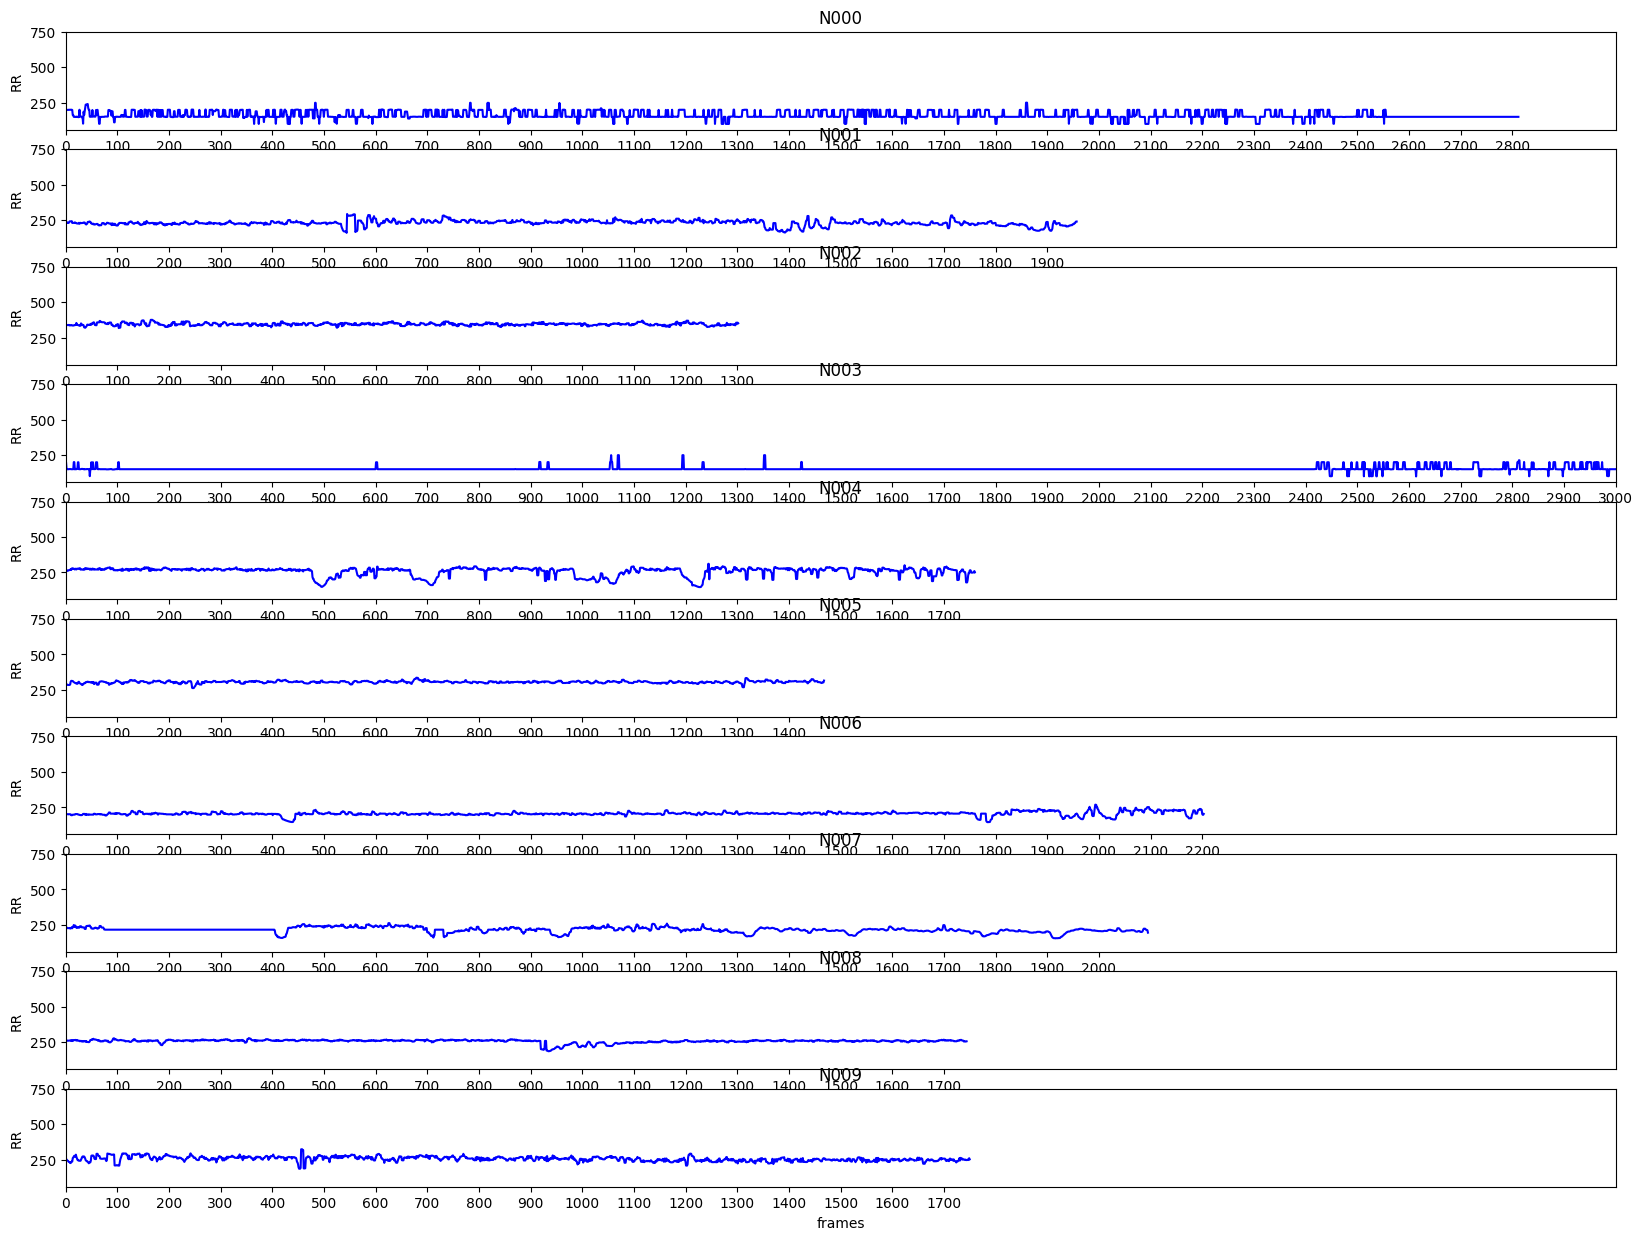

In [345]:
# fig, graphs = plt.subplots(nrows=10, figsize = (20,15), dpi = 100)

# for i in range(10):
#     graphs[i].xaxis.set_ticks(np.arange(0, len(rr_normal[i])+1, 100))
#     graphs[i].axis([0,3000,60,750])
#     graphs[i].plot(rr_normal[i], color = 'blue')
#     graphs[i].set_title("N" + str(i + 1).zfill(3))
#     graphs[i].set_xlabel('frames')
#     graphs[i].set_ylabel('RR')

### OSA RRi

1
1
1
1
1
1
1
1
1
1


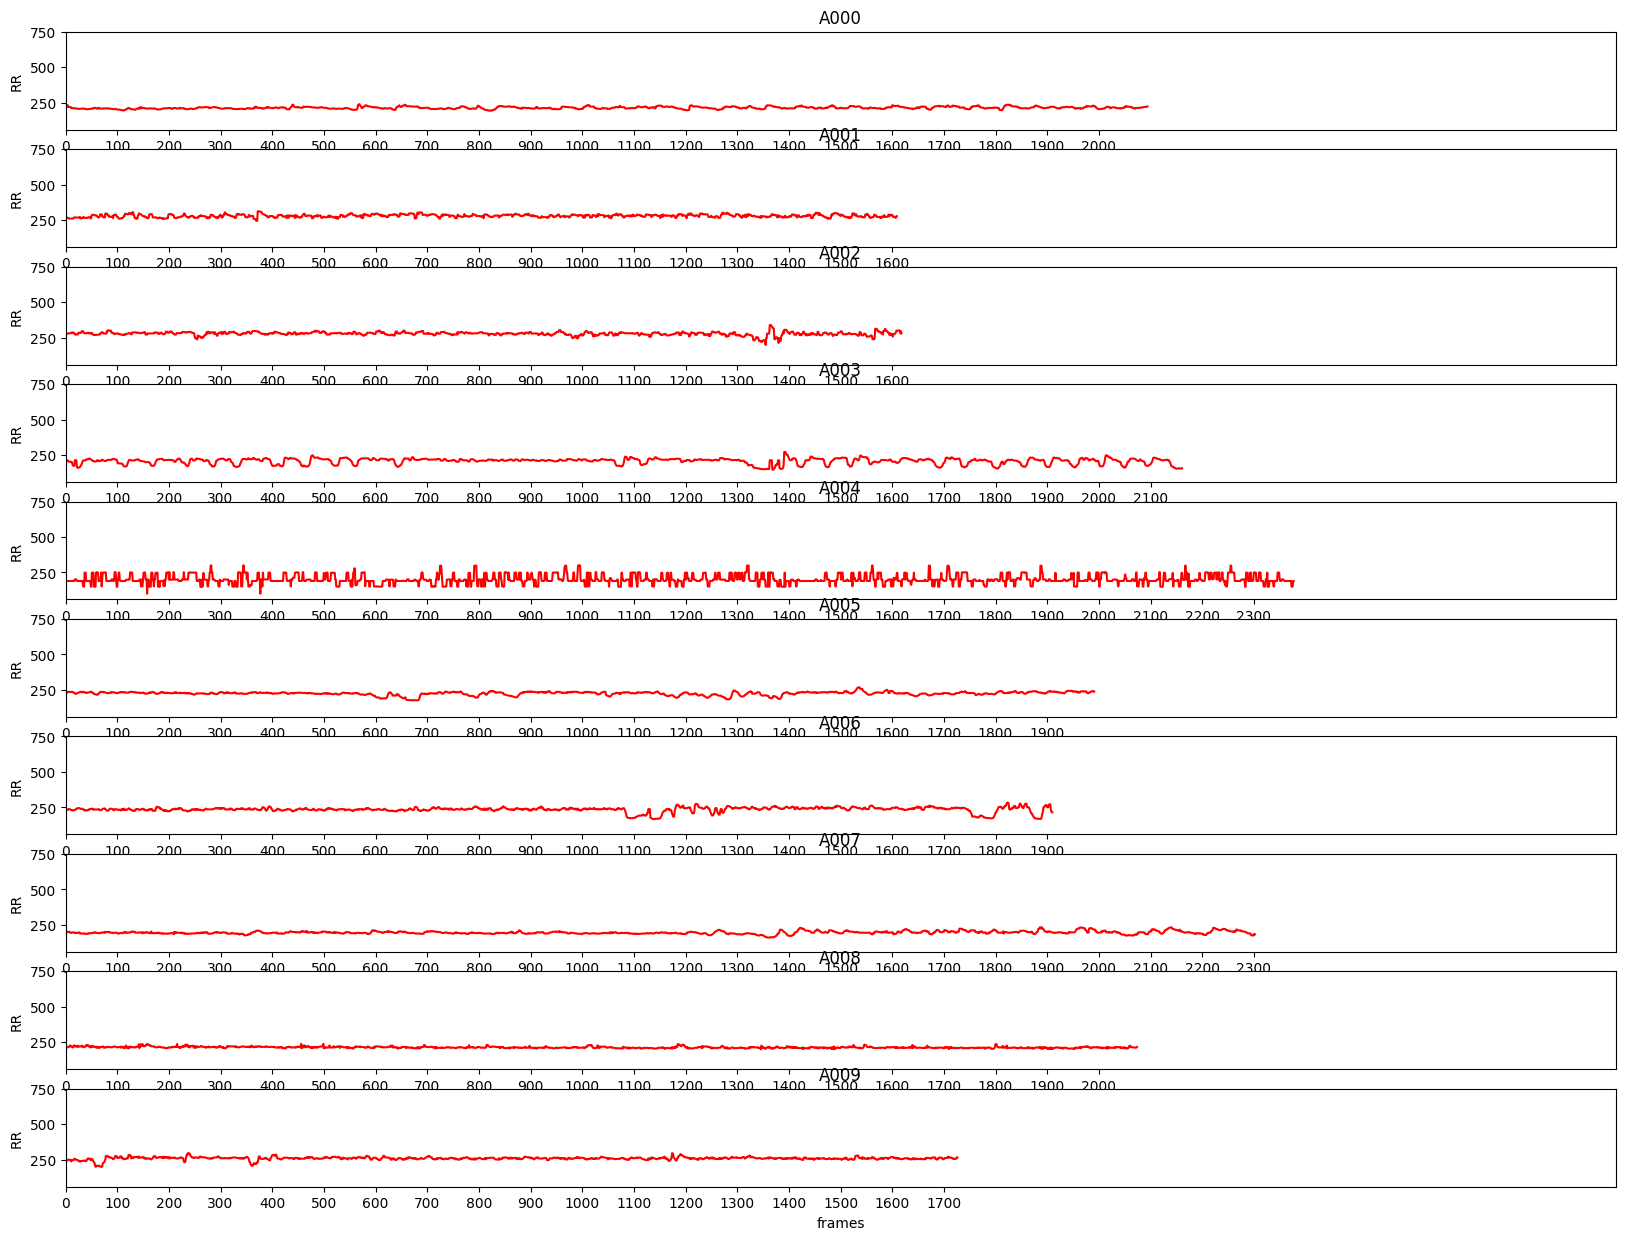

In [343]:
# fig, graphs = plt.subplots(nrows=10, figsize = (20,15), dpi = 100)

# for i in range(10):
#     print(1)
#     graphs[i].xaxis.set_ticks(np.arange(0, len(rr_osa[i])+1, 100))
#     graphs[i].plot(rr_osa[i], color = 'red')
#     graphs[i].axis([0,3000,60,750])
#     graphs[i].set_title("A" + str(i + 1).zfill(3))
#     graphs[i].set_xlabel('frames')
#     graphs[i].set_ylabel('RR')

### Test RRi

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


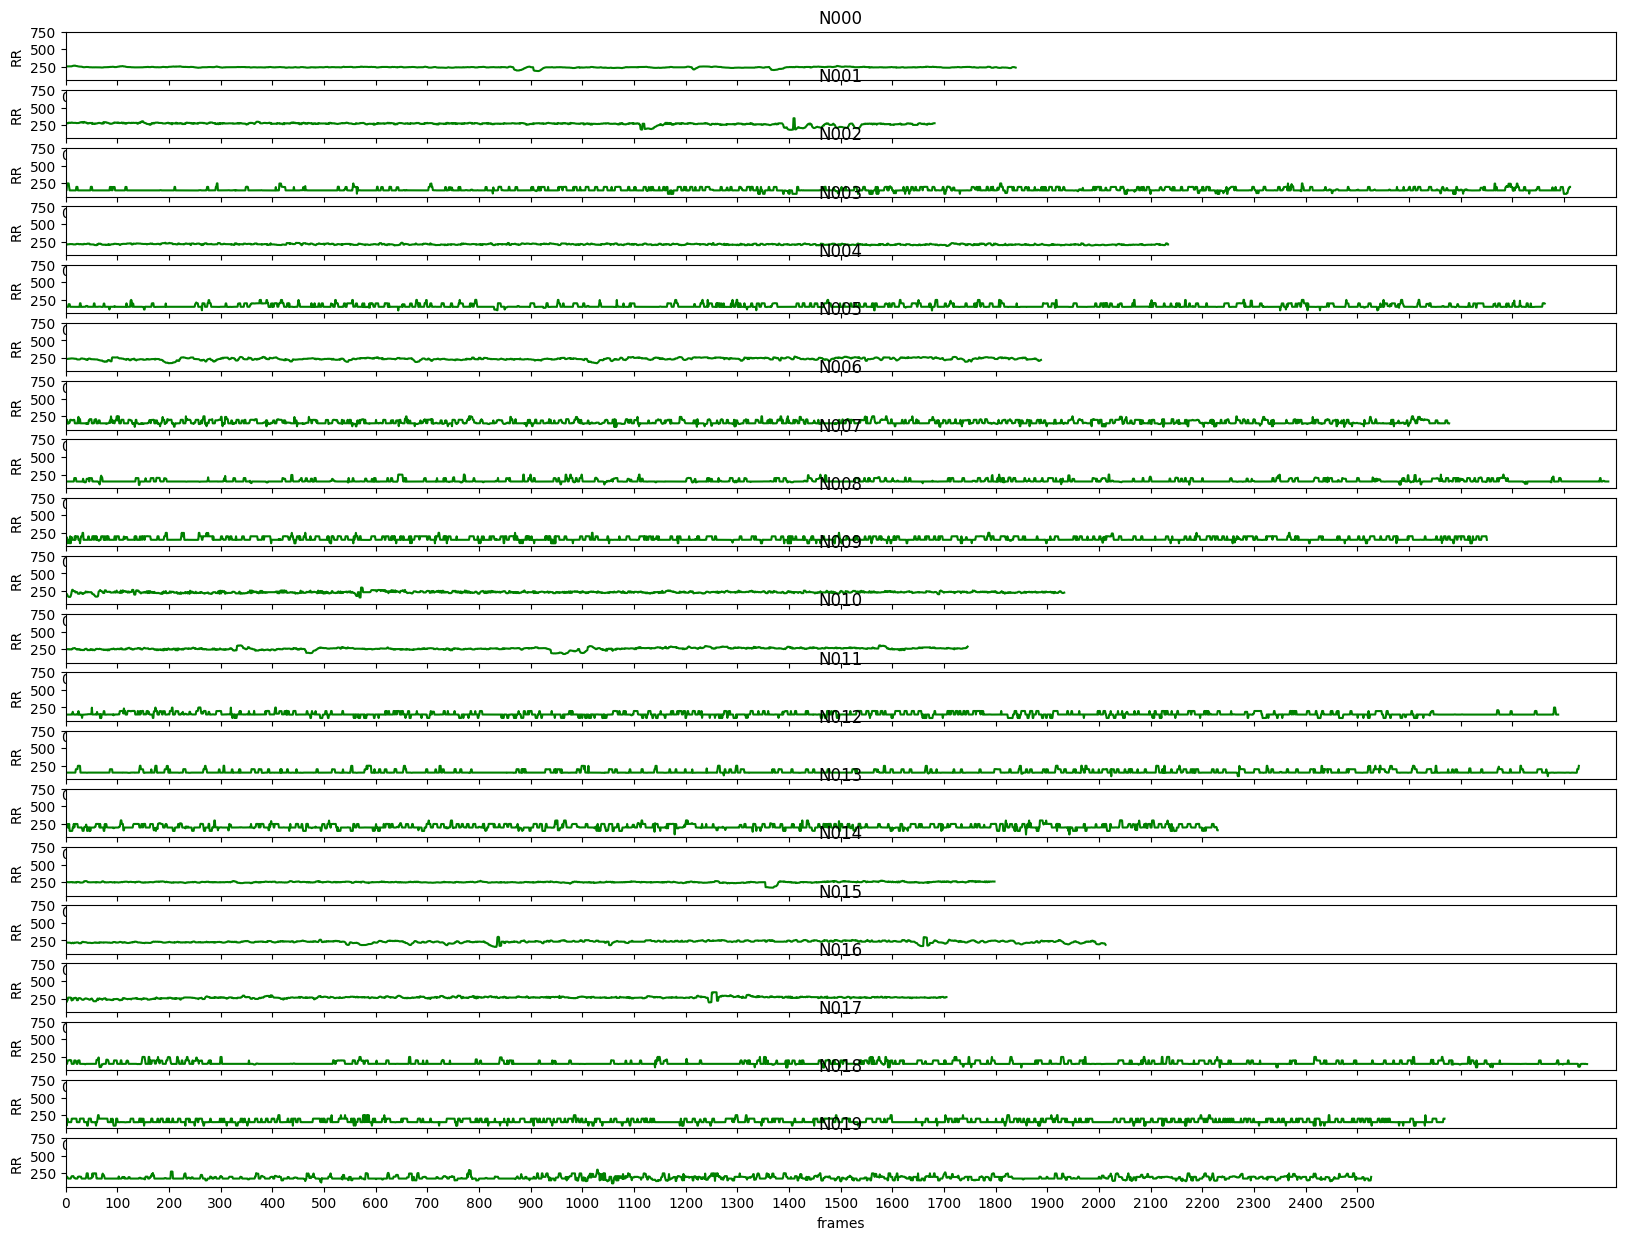

In [340]:
# fig, graphs = plt.subplots(nrows=20, figsize = (20,15), dpi = 100)

# for i in range(20):
#     print(1)
#     graphs[i].xaxis.set_ticks(np.arange(0, len(rr_test[i])+1, 100))
#     graphs[i].axis([0,3000,60,750])
#     graphs[i].plot(rr_test[i], color = 'green')
#     graphs[i].set_title("N" + str(i).zfill(3))
#     graphs[i].set_xlabel('frames')
#     graphs[i].set_ylabel('RR')